# **Demonstration**

In [ ]:
from lattice import Lattice, LineLattice, SquareLattice, TriangularLattice, HyperCubicLattice
from models import FermiHubbardModel
import retworkx as rx
import numpy as np
from math import pi

## ***General Lattice***
 General lattices are created from a PyGraph instance.

In [2]:
graph = rx.PyGraph(multigraph=False) # multiigraph shoud be False
graph.add_nodes_from(range(6))
weighted_edge_list = [(0, 1, 1.0+1.0j), (0, 2, -1.0), (2, 3, 2.0), (4, 2, -1.0 + 2.0j), (4, 4, 3.0), (2, 5, -1.0)]
graph.add_edges_from(weighted_edge_list)

# make a lattice
general_lattice = Lattice(graph)
set(general_lattice.graph.weighted_edge_list())

{(0, 1, (1+1j)),
 (0, 2, -1.0),
 (2, 3, 2.0),
 (2, 5, -1.0),
 (4, 2, (-1+2j)),
 (4, 4, 3.0)}

### **visualization**
The draw method visualizes the lattice.
Self-loops (edges that connect a node to itself) are not drawn by default.

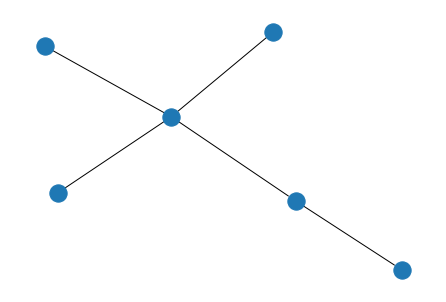

In [3]:
general_lattice.draw()

In [4]:
set(general_lattice.graph.weighted_edge_list())

{(0, 1, (1+1j)),
 (0, 2, -1.0),
 (2, 3, 2.0),
 (2, 5, -1.0),
 (4, 2, (-1+2j)),
 (4, 4, 3.0)}

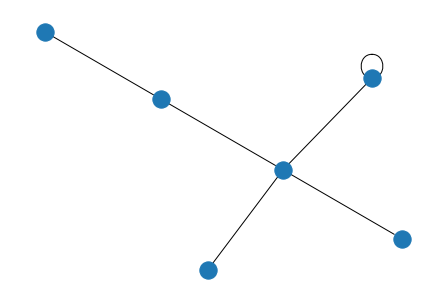

In [5]:
general_lattice.draw(self_loop=True)

Labels are drawn for each node when with_labels=True.

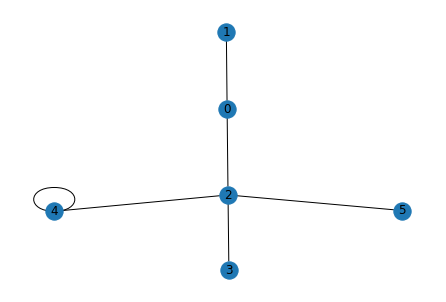

In [6]:
general_lattice.draw(self_loop=True, with_labels=True)

### **adjacency matrix(hopping matrix) $t_{x, y}$**
The to_adjacency_matrix method returns its adjacency matrix.
By default, it returns a Hermitian matrix whose matrix elements are the weights.
Please note that the above graph has a weight $(4, 2, -1.0 + 2.0j)$, and the adjacency matrix $M$ has a matrix element $M_{2, 4} = -1.0 + 2.0j$.

In [7]:
general_lattice.to_adjacency_matrix()

array([[ 0.+0.j,  1.+1.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 1.-1.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  2.+0.j, -1.+2.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.-2.j,  0.+0.j,  3.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

One can set weight=False, in which case the adjacency matrix has zero or one matrix elements.

In [8]:
general_lattice.to_adjacency_matrix(weighted=False)

array([[0., 1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]])

### **Fermi-Hubbard model**
The Hamiltonian of the Fermi-Hubbard model is defined as 
$H = \sum_{i, j} \sum_{\sigma=\uparrow, \downarrow} t_{i, j} c_{i, \sigma}^\dagger c_{j, \sigma} + U \sum_{i} n_{i, \uparrow} n_{i, \downarrow}$.\
We can construct FermiHubbardModel instance using 'FermiHubbardModel'.
We need lattice instance and an on-site intaraction parameter.
It has the spin degrees of freedom, the total number of qubits is $2 \times (\text{the number of lattice points}).$
Please note that even sites correspond up spins and odd sites correspoond down spins. \
The second_q_ops method returns a FermionicOp instance from the FermiHubbardModel.

In [9]:
onsite_interaction = 2.0

fhm = FermiHubbardModel(
    lattice=general_lattice,
    onsite_interaction=onsite_interaction
)

ham = fhm.second_q_ops(display_format="sparse")

# even site -> up spin
# odd sites -> down spin
print(ham)

Fermionic Operator
register length=12, number terms=28
  (1+1j) * ( +_0 -_2 )
+ (-1+1j) * ( -_0 +_2 )
+ (-1+0j) * ( +_0 -_4 )
+ (1+0j) * ( -_0 +_4 )
+ (2+0j) * ( +_4 -_6 )
+ (-2+0j) * ( -_4 +_6 )
+ (-1-2j) * ( +_4 -_8 )
+ (1-2j) * ( -_4 +_8 )
+ (3+0j) ...


The hopping_matrix method returns the hopping matrix $t_{i,j}$.

In [10]:
fhm.hopping_matrix()

array([[ 0.+0.j,  1.+1.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 1.-1.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  2.+0.j, -1.+2.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.-2.j,  0.+0.j,  3.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

### **Fermi-Hubbard model with uniform hopping and on-site potential**
The uniform_parameters allows us to make FermiHubbardModel with uniform hopping and on-site parameters.

In [11]:
fhm = FermiHubbardModel.uniform_parameters(
    lattice=general_lattice,
    uniform_hopping=-1.0 + 1.0j,
    uniform_onsite_potential=1.0,
    onsite_interaction=2.0
)
fhm.hopping_matrix()

array([[ 1.+0.j, -1.+1.j, -1.+1.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [-1.-1.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [-1.-1.j,  0.+0.j,  1.+0.j, -1.+1.j, -1.+1.j, -1.+1.j],
       [ 0.+0.j,  0.+0.j, -1.-1.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.-1.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.-1.j,  0.+0.j,  0.+0.j,  1.+0.j]])

## ***One-dimensional case(open boundary condition)***

In [12]:
lattice_points = 4
t = -1.0
onsite_potential = 1.0
one_dim_lattice = LineLattice(
    num_nodes=lattice_points,
    edge_parameter=t,
    onsite_parameter=onsite_potential,
    boundary_condition="open"
)

### **visualization**

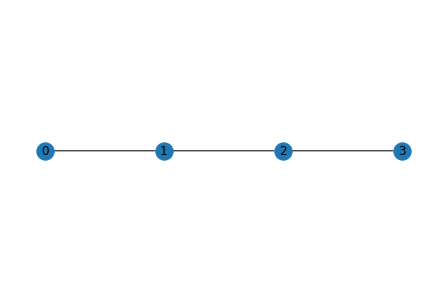

In [13]:
one_dim_lattice.draw(with_labels=True)

### **Fermi-Hubbard model**

In [14]:
onsite_interaction = 5.0
fhm = FermiHubbardModel(
    one_dim_lattice,
    onsite_interaction
)
ham = fhm.second_q_ops(display_format="sparse")
print(ham)

Fermionic Operator
register length=8, number terms=24
  (-1+0j) * ( +_0 -_2 )
+ (1+0j) * ( -_0 +_2 )
+ (-1+0j) * ( +_2 -_4 )
+ (1+0j) * ( -_2 +_4 )
+ (-1+0j) * ( +_4 -_6 )
+ (1+0j) * ( -_4 +_6 )
+ (1+0j) * ( +_0 -_0 )
+ (1+0j) * ( +_2 -_2 )
+ (1+0j)  ...


In [15]:
fhm.hopping_matrix()

array([[ 1.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  1.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  1.+0.j]])

### **Operator expression**

$$
\begin{align*}
H &= \sum_{i = 0}^{2} \sum_{\sigma = \uparrow, \downarrow} (t c_{i, \sigma}^\dagger c_{i+1, \sigma} + t c_{i+1, \sigma}^\dagger c_{i, \sigma})+ U \sum_{i=0}^{3} n_{i, \uparrow} n_{i, \downarrow} \\
&= t c_{0, \uparrow}^\dagger c_{1, \uparrow} - t c_{0, \uparrow} c_{1, \uparrow}^{\dagger} \\
& \ + t c_{1, \uparrow}^\dagger c_{2, \uparrow} - t c_{1, \uparrow} c_{2, \uparrow}^{\dagger} \\
& \ + t c_{2, \uparrow}^\dagger c_{3, \uparrow} - t c_{2, \uparrow} c_{3, \uparrow}^{\dagger} \\
& \ + v n_{0, \uparrow} + v n_{1, \uparrow} + v n_{2, \uparrow} + v n_{3, \uparrow} \\
& \ + t c_{0, \downarrow}^\dagger c_{1, \downarrow} - t c_{0, \downarrow} c_{1, \downarrow}^{\dagger} \\
& \ + t c_{1, \downarrow}^\dagger c_{2, \downarrow} - t c_{1, \downarrow} c_{2, \downarrow}^{\dagger} \\
& \ + t c_{2, \downarrow}^\dagger c_{3, \downarrow} - t c_{2, \downarrow} c_{3, \downarrow}^{\dagger} \\
& \ + v n_{0, \downarrow} + v n_{1, \downarrow} + v n_{2, \downarrow} + v n_{3, \downarrow} \\
& \ + U n_{0, \uparrow} n_{0, \downarrow} + U n_{1, \uparrow} n_{1, \downarrow} + + U n_{2, \uparrow} n_{2, \downarrow} + U n_{3, \uparrow} n_{3, \downarrow}
\end{align*}
$$

## ***One-dimensional case (periodic boundary condition)***

In [16]:
lattice_points = 8
t = -1.0
onsite_potential = 1.0
one_dim_lattice = LineLattice(
    num_nodes=lattice_points,
    edge_parameter=t,
    onsite_parameter=onsite_potential,
    boundary_condition="periodic"
)

### **visualization**

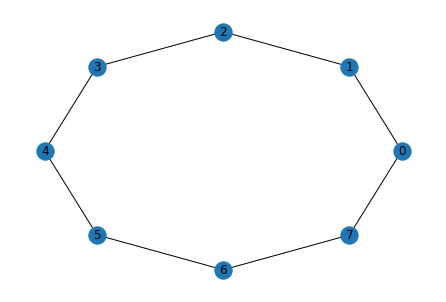

In [17]:
one_dim_lattice.draw(with_labels=True)

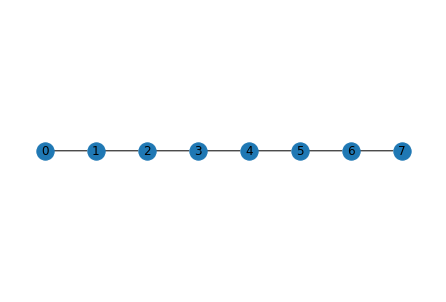

In [18]:
one_dim_lattice.draw_without_boundary(with_labels=True)

### **Fermi-Hubbard model**

In [19]:
fhm = FermiHubbardModel(
    one_dim_lattice,
    onsite_interaction
)

ham = fhm.second_q_ops(display_format="sparse")
print(ham)

Fermionic Operator
register length=16, number terms=56
  (-1+0j) * ( +_0 -_2 )
+ (1+0j) * ( -_0 +_2 )
+ (-1+0j) * ( +_2 -_4 )
+ (1+0j) * ( -_2 +_4 )
+ (-1+0j) * ( +_4 -_6 )
+ (1+0j) * ( -_4 +_6 )
+ (-1+0j) * ( +_6 -_8 )
+ (1+0j) * ( -_6 +_8 )
+ (-1+0j ...


## ***Square lattice***

In [20]:
rows = 6
cols = 4
square = SquareLattice(
    rows=rows,
    cols=cols,
    edge_parameter=(1.0, -1.0),
    onsite_parameter=1.0,
    boundary_condition=("periodic", "periodic")
)

### **visualization**

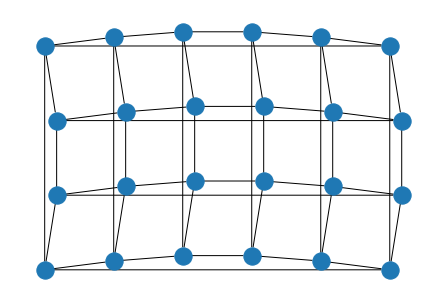

In [21]:
square.draw()

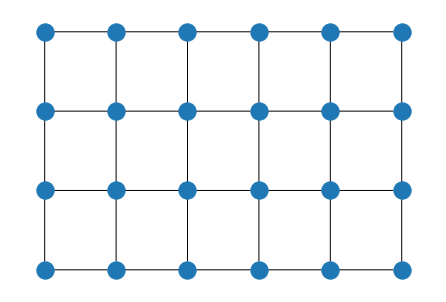

In [22]:
square.draw_without_boundary()

### **Fermi-Hubbard model**

In [23]:
onsite_interaction = 2.0
fhm = FermiHubbardModel(
    lattice=square,
    onsite_interaction=onsite_interaction
)

ham = fhm.second_q_ops(display_format="sparse")
print(ham)

Fermionic Operator
register length=48, number terms=264
  (1+0j) * ( +_0 -_2 )
+ (-1+0j) * ( -_0 +_2 )
+ (-1+0j) * ( +_0 -_12 )
+ (1+0j) * ( -_0 +_12 )
+ (1+0j) * ( +_12 -_14 )
+ (-1+0j) * ( -_12 +_14 )
+ (-1+0j) * ( +_12 -_24 )
+ (1+0j) * ( -_12 +_24  ...


In [24]:
fhm.hopping_matrix()

array([[ 1.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j, -1.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j],
       [ 1.+0.j,  1.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        -1.+0.j,  0.+0.j,  0.+0.j],
    

## ***Triangular lattice***

In [25]:
rows = 6
cols = 4
edge_parameter = (1.0, 2.0, 3.0)
onsite_parameter = 1.0
triangular = TriangularLattice(
    rows=rows,
    cols=cols,
    edge_parameter=edge_parameter,
    onsite_parameter=onsite_parameter,
    boundary_condition="periodic"
)

### **visualization**

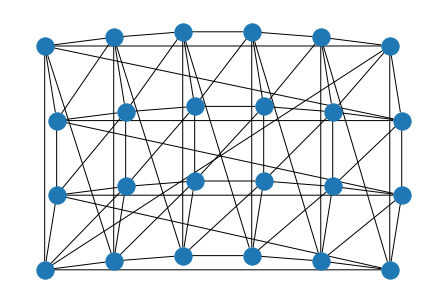

In [26]:
triangular.draw()

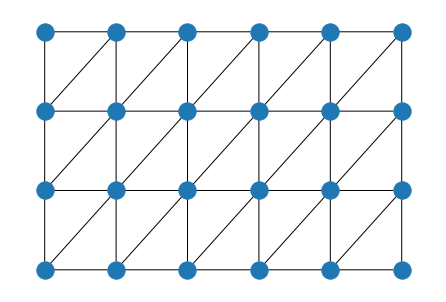

In [27]:
triangular.draw_without_boundary()

## ***Hyper cubic lattice***

In [28]:
def indextocoord_3d(index:int, size:tuple, angle=pi/6) -> list:
    z = index // (size[0]*size[1])
    a = index % (size[0]*size[1])
    y = a // size[0]
    x = a % size[0]
    vec_x = np.array([1, 0])
    vec_y = np.array([np.cos(angle), np.sin(angle)])
    vec_z = np.array([0, 1])
    return_coord = x*vec_x + y*vec_y + z*vec_z
    return return_coord.tolist()

In [29]:
# three dimension
size = (3, 3, 4)
edge_parameter = (-1.0, 1.0, 1.0)
onsite_parameter = 1.0
boundary_condition = ("open", "open", "periodic")
cubic = HyperCubicLattice(
    size=size,
    edge_parameter=edge_parameter,
    onsite_parameter=onsite_parameter,
    boundary_condition=boundary_condition
)

### **visualization**

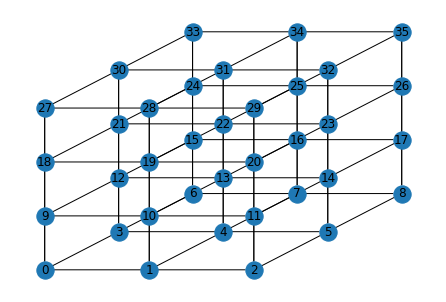

In [30]:
pos = dict([(index, indextocoord_3d(index, size, angle=pi/4)) for index in range(np.prod(size))])

cubic.draw(pos=pos, with_labels=True)

## ***The FHM from parameters(hopping matrix and on-site interaction)***

In [31]:
hopping_matrix = np.array([
    [1. , -1. + 1.j, -5.+5.j], 
    [-1.-1.j, 2., 1.], 
    [-5.-5.j, 1., 2.]
])

onsite_interaction = 2.0

fhm = FermiHubbardModel.from_parameters(
    hopping_matrix=hopping_matrix,
    onsite_interaction=onsite_interaction
)

ham = fhm.second_q_ops(display_format="sparse")
print(ham)
print(fhm.hopping_matrix())

Fermionic Operator
register length=6, number terms=21
  (1+0j) * ( +_0 -_0 )
+ (-1+1j) * ( +_0 -_2 )
+ (1+1j) * ( -_0 +_2 )
+ (-5+5j) * ( +_0 -_4 )
+ (5+5j) * ( -_0 +_4 )
+ (2+0j) * ( +_2 -_2 )
+ (1+0j) * ( +_2 -_4 )
+ (-1+0j) * ( -_2 +_4 )
+ (2+0j)  ...
[[ 1.+0.j -1.+1.j -5.+5.j]
 [-1.-1.j  2.+0.j  1.+0.j]
 [-5.-5.j  1.+0.j  2.+0.j]]
